In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [24]:
#  select random points
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [25]:
## centroid function
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [26]:
## centroid maker
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [27]:
## k means function
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [28]:
def pca(X):
#    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
##    print('cov \n', cov)
#    print()
#    # perform SVD
    U, S, V = np.linalg.svd(cov) # singular value decomposition
#    
    return U, S, V

In [29]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)


In [30]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [31]:
#load data

data = loadmat('/content/ex7data1.mat')
#print(data)
#print(data['X'])
print(data['X'].shape)

(50, 2)


In [35]:
# classify points 
X = data['X']
#initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
#initial_centroids = np.array([[8, 0], [8, 6], [0, 3]])
initial_centroids =  init_centroids(X, 3)
print(initial_centroids )

[[3.17929886 4.43686032]
 [5.70732809 6.68103995]
 [3.03354125 3.97879278]]


In [33]:
idx = find_closest_centroids(X, initial_centroids)
print(idx)
 


[1. 2. 1. 1. 1. 2. 1. 0. 1. 2. 2. 2. 1. 2. 1. 2. 2. 1. 0. 2. 0. 1. 2. 1.
 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1.
 1. 2.]


In [34]:
#calculate new centroid
c = compute_centroids(X, idx, 3)
print(c)

[[5.57626128 6.90833503]
 [3.14506134 4.35696128]
 [4.98277699 5.65370377]]


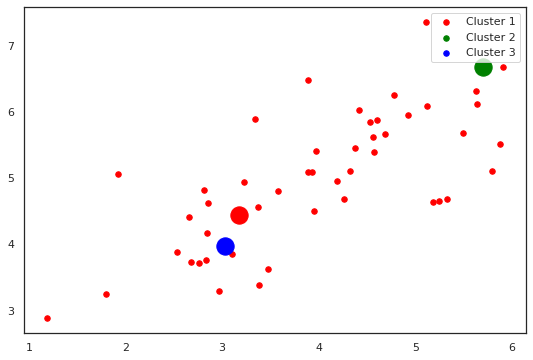

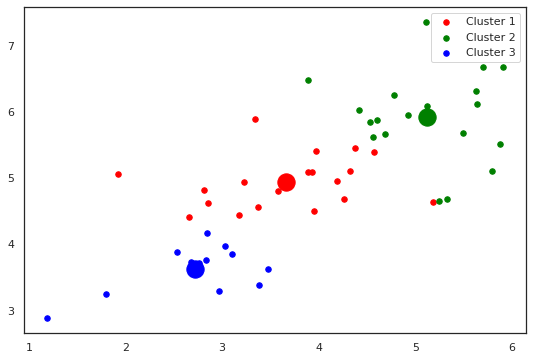

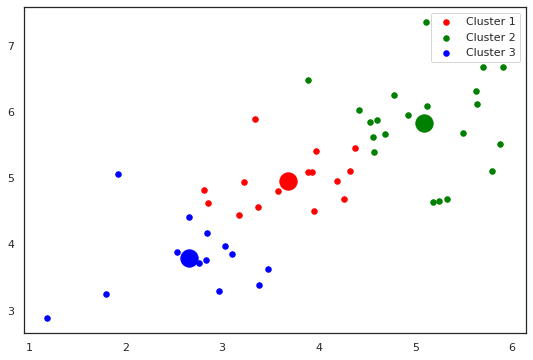

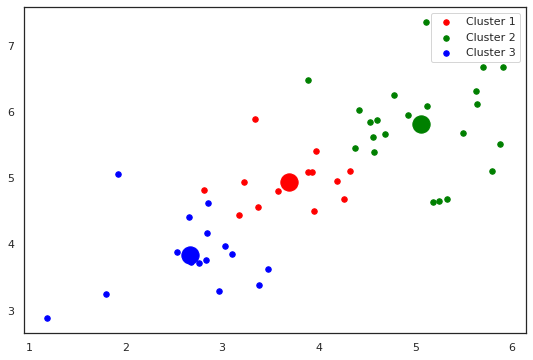

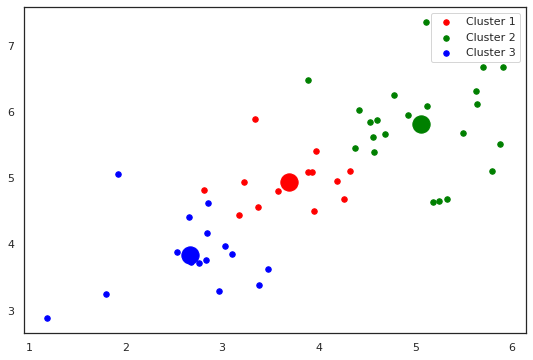

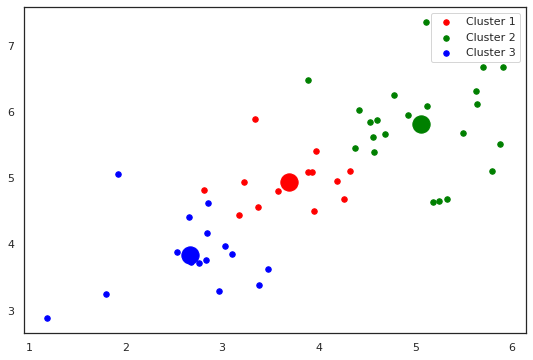

In [36]:
for x in range(6):

    # apply k means 
    idx, centroids = run_k_means(X, initial_centroids, x)
    #print(idx)
#    print()
#    print(centroids )
    
#    # draw it
    cluster1 = X[np.where(idx == 0)[0],:]
    cluster2 = X[np.where(idx == 1)[0],:]
    cluster3 = X[np.where(idx == 2)[0],:]
#    
    fig, ax = plt.subplots(figsize=(9,6))
    ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
    ax.scatter(centroids[0,0],centroids[0,1],s=300, color='r')
    
    ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
    ax.scatter(centroids[1,0],centroids[1,1],s=300, color='g')
    
    ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
    ax.scatter(centroids[2,0],centroids[2,1],s=300, color='b')
    
    ax.legend()

(128, 128, 3)


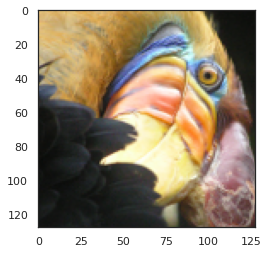

In [38]:
# we need to compress the image 
    
    
image_data = loadmat('/content/bird_small.mat')

#print(image_data)

A = image_data['A']
print(A.shape)
plt.imshow(A)

In [39]:
# normalize value ranges
A = A / 255.

In [40]:
# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
print(X.shape)

(16384, 3)


In [41]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)
print(initial_centroids)


[[0.11764706 0.13333333 0.13333333]
 [0.96862745 0.96470588 0.78431373]
 [1.         0.9254902  0.85882353]
 [0.89019608 0.88627451 0.8745098 ]
 [0.10196078 0.10196078 0.08235294]
 [0.55686275 0.38823529 0.10588235]
 [0.12156863 0.11372549 0.11764706]
 [0.99607843 0.98431373 0.76470588]
 [0.20784314 0.14117647 0.11764706]
 [0.54901961 0.43921569 0.22352941]
 [0.84313725 0.7254902  0.43921569]
 [0.15686275 0.16470588 0.18039216]
 [0.33333333 0.34117647 0.35686275]
 [0.18823529 0.20392157 0.23529412]
 [0.10588235 0.12156863 0.10980392]
 [0.65882353 0.56862745 0.3254902 ]]


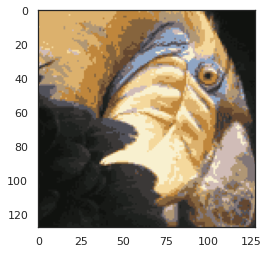

In [42]:
## run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

## get the closest centroids one last time
idx = find_closest_centroids(X, centroids)
#
## map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]
#
## reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
#
plt.imshow(X_recovered)

(50, 2)


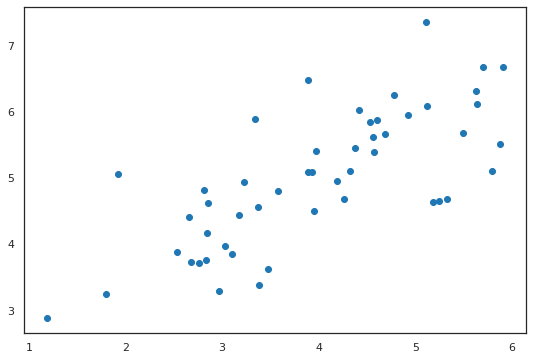

In [43]:
# Apply PCA

data = loadmat('/content/ex7data1.mat')
X = data['X']
print(X.shape)
#print(X)
#print()

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(X[:, 0], X[:, 1])



In [44]:

U, S, V = pca(X)
print(U)
print()
print(S)
#print()
print(V)
#

[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]

[1.43584536 0.56415464]
[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]


In [46]:
Z = project_data(X, U, 1)
#print(Z)


In [47]:
X_recovered = recover_data(Z, U, 1)
#print(X_recovered)
#print(X_recovered.shape)



(5000, 1024)


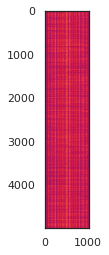

In [48]:
#-----------------------------------------------------------------------

# Apply PCA on faces

faces = loadmat('/content/ex7faces.mat')
X = faces['X']
print(X.shape)
plt.imshow(X)




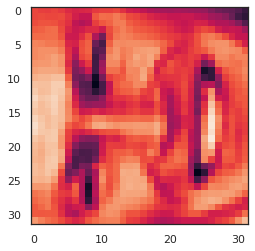

In [49]:
#show one face
face = np.reshape(X[41,:], (32, 32))
plt.imshow(face)


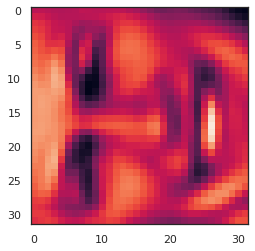

In [50]:
U, S, V = pca(X)
Z = project_data(X, U, 100)
#
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[41,:], (32, 32))
plt.imshow(face)